# keypoints

In [1]:
import cv2
import numpy as np
import pandas as pd
import imutils
import dlib
import os
from imutils import face_utils
import matplotlib.pyplot as plt
import mahotas as mh

In [6]:
dlib_loc = '/home/jiheeyou/subjective-output/shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(dlib_loc)

2024-05-22 14:05:23.662775: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 14:05:23.711837: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 14:05:23.711881: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 14:05:23.711915: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-22 14:05:23.720290: I tensorflow/core/platform/cpu_feature_g

There are 72 landmark points available


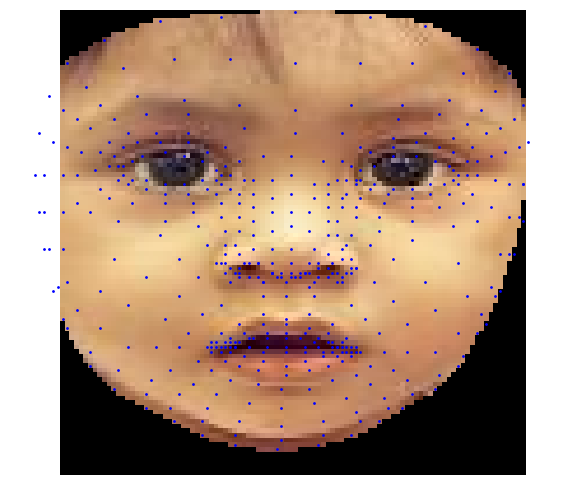

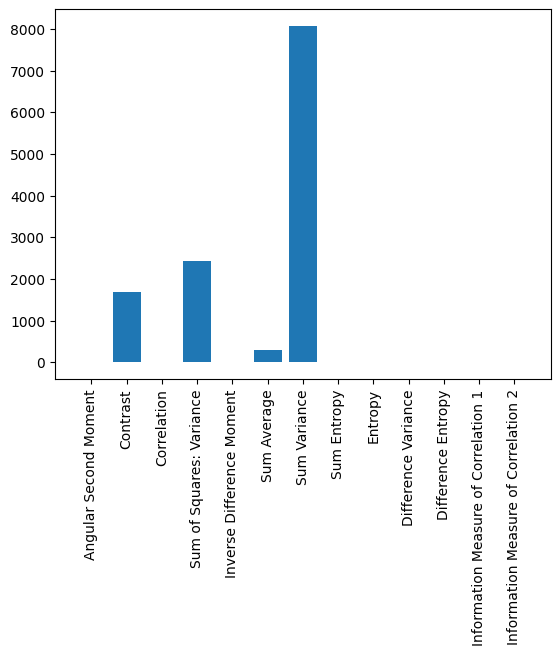

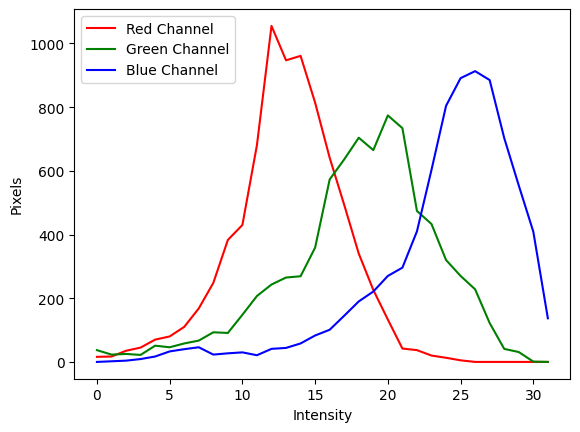

In [2]:
import mediapipe
img_dir = '/home/jiheeyou/subjective-output/rafdb_15k/DATASET/test/1'

img = cv2.imread(os.path.join(img_dir,'test_1556_aligned.jpg'))
mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
landmarks = results.multi_face_landmarks[0]
face_oval = mp_face_mesh.FACEMESH_FACE_OVAL
df = pd.DataFrame(list(face_oval), columns = ["p1", "p2"])

face_oval = mp_face_mesh.FACEMESH_FACE_OVAL

df = pd.DataFrame(list(face_oval), columns = ["p1", "p2"])
routes_idx = []
 
p1 = df.iloc[0]["p1"]
p2 = df.iloc[0]["p2"]
 
for i in range(0, df.shape[0]):
     
    #print(p1, p2)
     
    obj = df[df["p1"] == p2]
    p1 = obj["p1"].values[0]
    p2 = obj["p2"].values[0]
     
    route_idx = []
    route_idx.append(p1)
    route_idx.append(p2)
    routes_idx.append(route_idx)

routes = []

#for source_idx, target_idx in mp_face_mesh.FACEMESH_FACE_OVAL:
for source_idx, target_idx in routes_idx:
    
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
        
    relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
    relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))

    #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
    
    routes.append(relative_source)
    routes.append(relative_target)

print(f"There are {len(routes)} landmark points available")

mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)
out = np.zeros_like(img)
out[mask] = img[mask]

fig = plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

features = {}
for i in range(len(landmarks.landmark)):
    pt = landmarks.landmark[i]
    features[f'x{i}'] = pt.x # Between 0,1
    features[f'y{i}'] = pt.y # Between 0,1
    plt.scatter(int(img.shape[1] * pt.x), int(img.shape[0] * pt.y), s=1, c='b')

haralick_labels = ["Angular Second Moment",
                "Contrast",
                "Correlation",
                "Sum of Squares: Variance",
                "Inverse Difference Moment",
                "Sum Average",
                "Sum Variance",
                "Sum Entropy",
                "Entropy",
                "Difference Variance",
                "Difference Entropy",
                "Information Measure of Correlation 1",
                "Information Measure of Correlation 2",]
haralick_features = mh.features.haralick(out,ignore_zeros=True,return_mean=True)

for hl, hv in zip(haralick_labels, haralick_features):
   features[hl] = hv
plt.figure()
plt.bar(x=haralick_labels, height=haralick_features)
plt.xticks(rotation=90)

mask = mask.astype("uint8")
r_bins = cv2.calcHist([out],[0],mask,[32],[0,256])
g_bins = cv2.calcHist([out],[1],mask,[32],[0,256])
b_bins = cv2.calcHist([out],[2],mask,[32],[0,256])

plt.figure()
plt.plot(r_bins,color='red',label='Red Channel')
plt.plot(g_bins,color='green',label='Green Channel')
plt.plot(b_bins,color='blue',label='Blue Channel')
plt.xlabel('Intensity')
plt.ylabel('Pixels')
plt.legend()

plt.show()

In [97]:
features

{'x0': 0.48579081892967224,
 'y0': 0.6607673764228821,
 'x1': 0.495693176984787,
 'y1': 0.5483088493347168,
 'x2': 0.4898216724395752,
 'y2': 0.58673495054245,
 'x3': 0.4580934941768646,
 'y3': 0.43654942512512207,
 'x4': 0.49777939915657043,
 'y4': 0.5116859078407288,
 'x5': 0.49860191345214844,
 'y5': 0.4668595790863037,
 'x6': 0.49872875213623047,
 'y6': 0.359360933303833,
 'x7': 0.1370973289012909,
 'y7': 0.35147422552108765,
 'x8': 0.5016827583312988,
 'y8': 0.2659364640712738,
 'x9': 0.5042018890380859,
 'y9': 0.21321314573287964,
 'x10': 0.5071444511413574,
 'y10': 0.00993412733078003,
 'x11': 0.4848616123199463,
 'y11': 0.6784842014312744,
 'x12': 0.4837471544742584,
 'y12': 0.6949824690818787,
 'x13': 0.4827505946159363,
 'y13': 0.7046053409576416,
 'x14': 0.48222076892852783,
 'y14': 0.722021758556366,
 'x15': 0.48176658153533936,
 'y15': 0.7387398481369019,
 'x16': 0.4809873402118683,
 'y16': 0.7601619362831116,
 'x17': 0.48000821471214294,
 'y17': 0.7813093066215515,
 'x18'

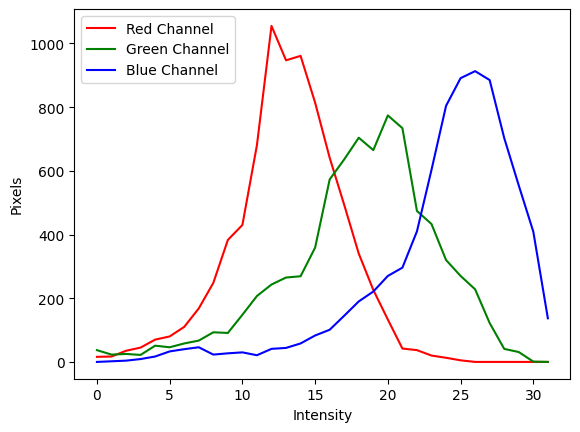

In [87]:
mask = mask.astype("uint8")
r_bins = cv2.calcHist([out],[0],mask,[32],[0,256])
g_bins = cv2.calcHist([out],[1],mask,[32],[0,256])
b_bins = cv2.calcHist([out],[2],mask,[32],[0,256])

plt.plot(r_bins,color='red',label='Red Channel')
plt.plot(g_bins,color='green',label='Green Channel')
plt.plot(b_bins,color='blue',label='Blue Channel')

plt.xlabel('Intensity')
plt.ylabel('Pixels')
plt.legend()

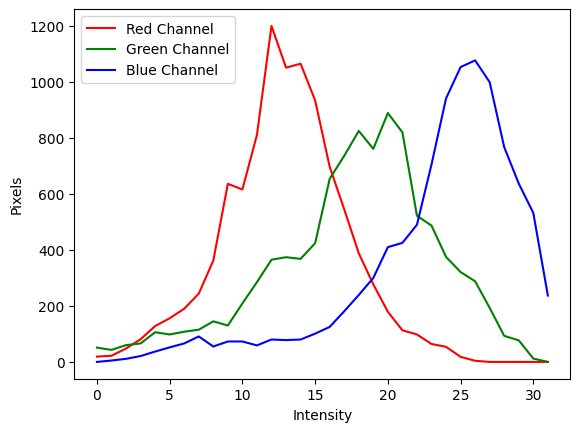

In [77]:
mask = mask.astype("uint8")
r_bins = cv2.calcHist([img],[0],None,[32],[0,256])
g_bins = cv2.calcHist([img],[1],None,[32],[0,256])
b_bins = cv2.calcHist([img],[2],None,[32],[0,256])

plt.plot(r_bins,color='red',label='Red Channel')
plt.plot(g_bins,color='green',label='Green Channel')
plt.plot(b_bins,color='blue',label='Blue Channel')

plt.xlabel('Intensity')
plt.ylabel('Pixels')
plt.legend()

In [9]:
img_dir = '/home/jiheeyou/subjective-output/rafdb_15k/DATASET/test/1'
keypoint_df = pd.DataFrame()

for nimg,img in enumerate([i for i in os.listdir(img_dir) if '.jpg' in i]):
    print(nimg)
    print(img)
    
    loaded_img = dlib.load_rgb_image(os.path.join(img_dir,img))
    
    img_x,img_y,img_c = np.shape(loaded_img)
    img_area = img_x*img_y
    
    det_rects = detector(loaded_img,1) #rectangles are output as ((left,top),(right,bottom))
    reasonable_rects = [rect for rect in det_rects if rect.width()*rect.height() >= 0.01*img_area] #spurious faces tend to be small
    
    if len(reasonable_rects) == 0:
        print('no detections',img)
        continue
        
    if len(reasonable_rects) > 1:
        print('>1 detection',img)
        continue
        
    if len(reasonable_rects) == 1:
        face_rect = reasonable_rects[0]
        face = predictor(loaded_img,face_rect)
        
        part_dict = {}
        
        for npart,part in enumerate(face.parts()):
            part_dict[f'x_{npart}'] = part.x
            part_dict[f'y_{npart}'] = part.y
            
        these_keypoints = pd.DataFrame(part_dict,index=[0])
        these_keypoints['img_name'] = img
        
        keypoint_df = pd.concat([keypoint_df,these_keypoints])
    

keypoint_df.reset_index(drop=True,inplace=True)

0
test_1108_aligned.jpg
no detections test_1108_aligned.jpg
1
test_0297_aligned.jpg
no detections test_0297_aligned.jpg
2
test_1971_aligned.jpg
3
test_1722_aligned.jpg
no detections test_1722_aligned.jpg
4
test_1556_aligned.jpg
5
test_2130_aligned.jpg
no detections test_2130_aligned.jpg
6
test_2051_aligned.jpg
no detections test_2051_aligned.jpg
7
test_0340_aligned.jpg
8
test_1165_aligned.jpg
9
test_1913_aligned.jpg
10
test_0243_aligned.jpg
no detections test_0243_aligned.jpg
11
test_0920_aligned.jpg
12
test_1903_aligned.jpg
13
test_0517_aligned.jpg
14
test_1014_aligned.jpg
no detections test_1014_aligned.jpg
15
test_1750_aligned.jpg
16
test_0851_aligned.jpg
no detections test_0851_aligned.jpg
17
test_0288_aligned.jpg
no detections test_0288_aligned.jpg
18
test_1549_aligned.jpg
no detections test_1549_aligned.jpg
19
test_1732_aligned.jpg
no detections test_1732_aligned.jpg
20
test_0694_aligned.jpg
21
test_0008_aligned.jpg
no detections test_0008_aligned.jpg
22
test_1504_aligned.jpg
no 